In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
from PIL import Image #import Python Image Library
import numpy as np
import os
import glob
import re
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [25]:
path = os.path.abspath('.cnn.py')

In [26]:
path = re.sub('[a-zA-Z\s._]+$', '', path) #remove unintended file

In [27]:
print(path)

/content/


In [28]:
dirs = os.listdir(path+'/drive/MyDrive/Images/')

In [29]:
img_rows = 256
img_cols = 256
num_class = 21
path = os.path.abspath('.cnn.py') #absolute path of program
path = re.sub('[a-zA-Z\s._]+$', '', path) #remove unintended file
x_train = []
y_train = []
x_test = []
y_test = []
dirs = os.listdir(path+'/drive/My Drive/Images/')
dirs=dirs[:-1]
print(len(dirs))
'''

'''

20


'\n\n'

In [30]:
label = 0
for i in dirs:
	n = 0
	count = 0
	for pic in glob.glob(path+'/drive/My Drive/Images/'+i+'/*.tif'):
		im = Image.open(pic)
		im = np.array(im)
		if((im.shape[0]==256) and (im.shape[1] ==256) and count <90): #get only 90 data
			r = im[:,:,0]
			g = im[:,:,1]
			b = im[:,:,2]
			if(n<5): # 5 data in beginning set as test data
				x_test.append([r,g,b])
				y_test.append([label])
			else: #remaining data set as training data
				x_train.append([r,g,b])
				y_train.append([label])
			n = n + 1
			count = count + 1
		#print(count)
	label = label + 1

In [31]:
x_trainbck=x_train
x_testbck=x_test

In [32]:
x_train=np.array(x_train)
x_test=np.array(x_test)


In [33]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)

input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train, 21)
y_test = keras.utils.np_utils.to_categorical(y_test, 21)


In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import time
IMG_SIZE =256 # Replace with the size of your images
NB_CHANNELS =3 # 3 for RGB images or 1 for grayscale images
BATCH_SIZE = 32# Typical values are 8, 16 or 32
NB_TRAIN_IMG = 1688 # Replace with the total number training images
NB_VALID_IMG = 421 # Replace with the total number validation images

In [ ]:
!pip install  split_folders

In [ ]:
import splitfolders
splitfolders.ratio(path+'/drive/My Drive/Images/', output=path+'/drive/My Drive/output/', seed=1337, ratio=(.

In [35]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,NB_CHANNELS),
               data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(21, activation='softmax'))
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [36]:
train_datagen = ImageDataGenerator(
    rotation_range = 40,                  
    width_shift_range = 0.2,                  
    height_shift_range = 0.2,                  
    rescale = 1./255,                  
    shear_range = 0.2,                  
    zoom_range = 0.2,                     
    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    path+'/drive/My Drive/output/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    batch_size = BATCH_SIZE)
validation_generator = validation_datagen.flow_from_directory(
    path+'/drive/My Drive/output/val',
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    batch_size = BATCH_SIZE)

Found 1688 images belonging to 21 classes.
Found 421 images belonging to 21 classes.


In [37]:
start = time.time()
h = model.fit_generator(
    train_generator,
    steps_per_epoch=NB_TRAIN_IMG//BATCH_SIZE,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=NB_VALID_IMG//BATCH_SIZE)
end = time.time()
print('Processing time:',(end - start)/60)
model.save_weights('cnn_baseline.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
52/52 [==============================] - 29s 540ms/step - loss: 3.7048 - accuracy: 0.0562 - val_loss: 3.0303 - val_accuracy: 0.0625
Epoch 2/50
52/52 [==============================] - 28s 542ms/step - loss: 2.9654 - accuracy: 0.0773 - val_loss: 2.8948 - val_accuracy: 0.1250
Epoch 3/50
52/52 [==============================] - 27s 528ms/step - loss: 2.9146 - accuracy: 0.1021 - val_loss: 2.8344 - val_accuracy: 0.1851
Epoch 4/50
52/52 [==============================] - 27s 526ms/step - loss: 2.8140 - accuracy: 0.1304 - val_loss: 2.7196 - val_accuracy: 0.1635
Epoch 5/50
52/52 [==============================] - 27s 528ms/step - loss: 2.7585 - accuracy: 0.1624 - val_loss: 2.5715 - val_accuracy: 0.2404
Epoch 6/50
52/52 [==============================] - 29s 552ms/step - loss: 2.6965 - accuracy: 0.1775 - val_loss: 2.5151 - val_accuracy: 0.2764
Epoch 7/50
52/52 [==============================] - 27s 528ms/step - loss: 2.5564 - accuracy: 0.2059 - val_loss: 2.3184 - val_accuracy: 0.3269

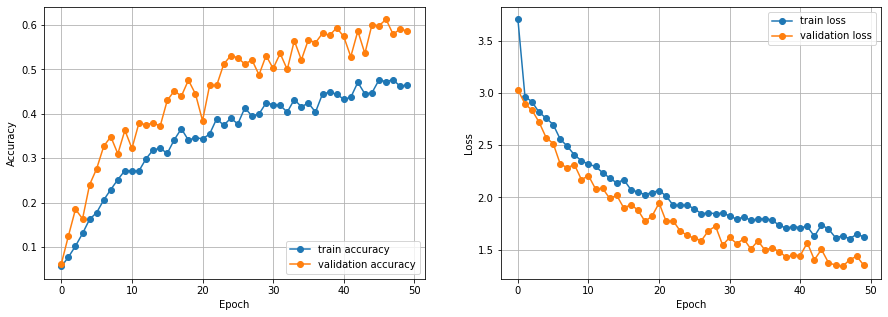

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()